# Linear Regression Model

Linear regression is a fundamental model in machine learning used for predicting a continuous output variable based on input features. The model function for linear regression is represented as:

$$f_{w,b}(x) = wx + b$$

In this equation, $f_{w,b}(x)$ represents the predicted output, $w$ is the weight parameter, $b$ is the bias parameter, and $x$ is the input feature.

## Model Training

To train a linear regression model, we aim to find the best values for the parameters $(w, b)$ that best fit our dataset.

### Forward Pass

The forward pass is a step where we compute the linear regression output for the input data $X$ using the current weights and biases. It's essentially applying our model to the input data.

### Cost Function

The cost function is used to measure how well our model is performing. It quantifies the difference between the predicted values and the actual values in our dataset. The cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Here, $J(w, b)$ is the cost, $m$ is the number of training examples, $x^{(i)}$ is the input data for the $i$-th example, $y^{(i)}$ is the actual output for the $i$-th example, and $w$ and $b$ are the weight and bias parameters, respectively.

### Backward Pass (Gradient Computation)

The backward pass computes the gradients of the cost function with respect to the weights and biases. These gradients are crucial for updating the model parameters during training. The gradient formulas are as follows:

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$

## Training Process

The training process involves iteratively updating the weights and biases to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the model learns to make better predictions and fit the data.


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlfs.linear_regression import LinearRegression as CustomLinearRegression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [5]:
def generate_data(n_samples, n_features=10, noise=0.1, random_state=42):
    rng = np.random.RandomState(random_state)
    X = rng.randn(n_samples, n_features)
    true_coef = rng.randn(n_features)
    y = X.dot(true_coef) + noise * rng.randn(n_samples)
    return X, y

In [ ]:
def benchmark(n_samples_list, n_features=10, n_repeats=3):
    results = []
    for n in n_samples_list:
        X, y = generate_data(n, n_features)
        custom_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = CustomLinearRegression()
            t0 = time.perf_counter()
            model.fit(X, y)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            custom_times['fit'].append(t1 - t0)
            custom_times['predict'].append(t2 - t1)
        sklearn_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = SklearnLinearRegression()
            t0 = time.perf_counter()
            model.fit(X, y)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            sklearn_times['fit'].append(t1 - t0)
            sklearn_times['predict'].append(t2 - t1)
        results.append({
            'n_samples': n,
            'custom_fit': np.mean(custom_times['fit']),
            'custom_predict': np.mean(custom_times['predict']),
            'sklearn_fit': np.mean(sklearn_times['fit']),
            'sklearn_predict': np.mean(sklearn_times['predict']),
        })
    return pd.DataFrame(results)


In [ ]:
n_samples_list = [100, 1_000, 5_000, 10_000, 20_000]
df = benchmark(n_samples_list)
df


Iteration 0: Cost = 2.809339
Iteration 100: Cost = 0.483346
Iteration 200: Cost = 0.106161
Iteration 300: Cost = 0.031393
Iteration 400: Cost = 0.013077
Iteration 500: Cost = 0.007663
Iteration 600: Cost = 0.005839
Iteration 700: Cost = 0.005176
Iteration 800: Cost = 0.004924
Convergence reached at iteration 844


Iteration 0: Cost = 2.812396
Iteration 100: Cost = 0.484861
Iteration 200: Cost = 0.106641
Iteration 300: Cost = 0.031535
Iteration 400: Cost = 0.013119
Iteration 500: Cost = 0.007677
Iteration 600: Cost = 0.005844
Iteration 700: Cost = 0.005177
Iteration 800: Cost = 0.004925
Convergence reached at iteration 844


Iteration 0: Cost = 2.804468
Iteration 100: Cost = 0.482424
Iteration 200: Cost = 0.106065
Iteration 300: Cost = 0.031400
Iteration 400: Cost = 0.013086
Iteration 500: Cost = 0.007668
Iteration 600: Cost = 0.005841
Iteration 700: Cost = 0.005176
Iteration 800: Cost = 0.004924
Convergence reached at iteration 844


Iteration 0: Cost = 3.033319
Iteration 100: Cost = 0.397908
Iteration 200: Cost = 0.058539
Iteration 300: Cost = 0.012440
Iteration 400: Cost = 0.005850
Iteration 500: Cost = 0.004864
Convergence reached at iteration 567


Iteration 0: Cost = 3.019530
Iteration 100: Cost = 0.396068
Iteration 200: Cost = 0.058276
Iteration 300: Cost = 0.012401
Iteration 400: Cost = 0.005844
Iteration 500: Cost = 0.004863
Convergence reached at iteration 566


Iteration 0: Cost = 3.023329
Iteration 100: Cost = 0.396565
Iteration 200: Cost = 0.058345
Iteration 300: Cost = 0.012411
Iteration 400: Cost = 0.005845
Iteration 500: Cost = 0.004863
Convergence reached at iteration 567


Iteration 0: Cost = 3.699689
Iteration 100: Cost = 0.483583
Iteration 200: Cost = 0.067648
Iteration 300: Cost = 0.013309
Iteration 400: Cost = 0.006140
Iteration 500: Cost = 0.005186
Convergence reached at iteration 555


Iteration 0: Cost = 3.687285
Iteration 100: Cost = 0.481962
Iteration 200: Cost = 0.067434
Iteration 300: Cost = 0.013281
Iteration 400: Cost = 0.006137
Iteration 500: Cost = 0.005185
Convergence reached at iteration 555


Iteration 0: Cost = 3.680515
Iteration 100: Cost = 0.480967
Iteration 200: Cost = 0.067287
Iteration 300: Cost = 0.013259
Iteration 400: Cost = 0.006133
Iteration 500: Cost = 0.005185
Convergence reached at iteration 555


Iteration 0: Cost = 4.569317
Iteration 100: Cost = 0.627068
Iteration 200: Cost = 0.090132
Iteration 300: Cost = 0.016660
Iteration 400: Cost = 0.006562
Iteration 500: Cost = 0.005168
Convergence reached at iteration 576


Iteration 0: Cost = 4.568980
Iteration 100: Cost = 0.627024
Iteration 200: Cost = 0.090127
Iteration 300: Cost = 0.016660
Iteration 400: Cost = 0.006562
Iteration 500: Cost = 0.005168
Convergence reached at iteration 576


Iteration 0: Cost = 4.571943
Iteration 100: Cost = 0.627396
Iteration 200: Cost = 0.090172
Iteration 300: Cost = 0.016665
Iteration 400: Cost = 0.006562
Iteration 500: Cost = 0.005168
Convergence reached at iteration 576


Iteration 0: Cost = 4.836779
Iteration 100: Cost = 0.642233
Iteration 200: Cost = 0.089328
Iteration 300: Cost = 0.016180
Iteration 400: Cost = 0.006467
Iteration 500: Cost = 0.005173
Convergence reached at iteration 570


Iteration 0: Cost = 4.821159
Iteration 100: Cost = 0.640263
Iteration 200: Cost = 0.089080
Iteration 300: Cost = 0.016148
Iteration 400: Cost = 0.006463
Iteration 500: Cost = 0.005172
Convergence reached at iteration 570


Iteration 0: Cost = 4.836662
Iteration 100: Cost = 0.642276
Iteration 200: Cost = 0.089342
Iteration 300: Cost = 0.016183
Iteration 400: Cost = 0.006468
Iteration 500: Cost = 0.005173
Convergence reached at iteration 570


,n_samples,custom_fit,custom_predict,sklearn_fit,sklearn_predict
0,100,1.360785,0.000058,0.004343,0.000152
1,1000,0.099276,0.000047,0.001341,0.000120
2,5000,0.121136,0.000052,0.002541,0.000188
3,10000,0.193622,0.000045,0.003164,0.000161
4,20000,0.262068,0.000057,0.005514,0.000159


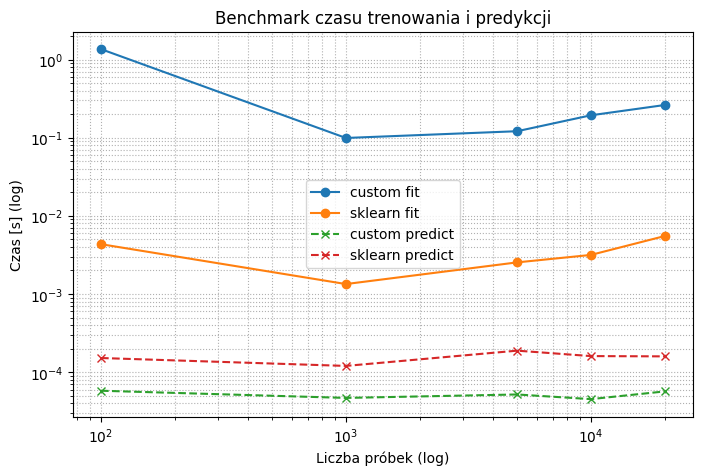

In [ ]:
plt.figure(figsize=(8,5))
plt.loglog(df['n_samples'], df['custom_fit'], marker='o', label='custom fit')
plt.loglog(df['n_samples'], df['sklearn_fit'], marker='o', label='sklearn fit')
plt.loglog(df['n_samples'], df['custom_predict'], marker='x', linestyle='--', label='custom predict')
plt.loglog(df['n_samples'], df['sklearn_predict'], marker='x', linestyle='--', label='sklearn predict')
plt.xlabel('Liczba próbek (log)')
plt.ylabel('Czas [s] (log)')
plt.title('Benchmark czasu trenowania i predykcji')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()


# Wnioski

- **Złożoność**: na wykresie widać, czy Twoja implementacja zachowuje oczekiwane tempo wzrostu (O(n·d²) lub O(n·d), w zależności od algorytmu).  
- **Porównanie**: wskaż różnice w pre-caching, optymalizacjach BLAS w `sklearn` itp.  
- **Kolejne kroki**: zoptymalizowanie mnożeń macierzowych lub przejście na metody iteracyjne.


### 1. Mean Squared Error (MSE)

**Formula:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

**Description:**
- **Mean Squared Error (MSE)** is a widely used metric for evaluating the accuracy of regression models.
- It measures the average squared difference between the predicted values ($y_{\text{pred}}$) and the actual target values ($y_{\text{true}}$).
- The squared differences are averaged across all data points in the dataset.

**Interpretation:**
- A lower MSE indicates a better fit of the model to the data, as it means the model's predictions are closer to the actual values.
- MSE is sensitive to outliers because the squared differences magnify the impact of large errors.

### 2. Root Mean Squared Error (RMSE)

**Formula:**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Description:**
- **Root Mean Squared Error (RMSE)** is a variant of MSE that provides the square root of the average squared difference between predicted and actual values.
- It is often preferred because it is in the same unit as the target variable, making it more interpretable.

**Interpretation:**
- Like MSE, a lower RMSE indicates a better fit of the model to the data.
- RMSE is also sensitive to outliers due to the square root operation.

### 3. R-squared ($R^2$)

**Formula:**
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

**Description:**
- **R-squared ($R^2$)**, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable ($y_{\text{true}}$) that is predictable from the independent variable(s) ($y_{\text{pred}}$) in a regression model.
- It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit.

**Interpretation:**
- A higher $R^2$ value suggests that the model explains a larger proportion of the variance in the target variable.
- However, $R^2$ does not provide information about the goodness of individual predictions or whether the model is overfitting or underfitting.


In [ ]:
from mlfs.metrics import mse as custom_mse, rmse as custom_rmse, r2_score as custom_r2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score as sklearn_r2
from mlfs.preprocessing import train_test_split, standardize


X, y = generate_data(1000)
X_train, X_test, y_train, y_test = train_test_split(X,y)

custom_model = CustomLinearRegression()
custom_model.fit(X_train, y_train)
sk_model = SklearnLinearRegression()
sk_model = sk_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)
y_pred_sk     = sk_model.predict(X_test)

custom_metrics = {
    'MSE': custom_mse,
    'RMSE': custom_rmse,
    'R2': custom_r2,
}

sklearn_metrics = {
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
    'R2': sklearn_r2,
}

results = []
for name, y_pred, metrics_dict in [
    ('custom', y_pred_custom, custom_metrics),
    ('sklearn', y_pred_sk, sklearn_metrics)
]:
    row = {'model': name}
    for m_name, m_func in metrics_dict.items():
        row[m_name] = m_func(y_test, y_pred)
    results.append(row)

df_results = pd.DataFrame(results)
df_results

Iteration 0: Cost = 3.132094
Iteration 100: Cost = 0.382862
Iteration 200: Cost = 0.053677
Iteration 300: Cost = 0.011481
Iteration 400: Cost = 0.005706
Iteration 500: Cost = 0.004868
Convergence reached at iteration 557


,model,MSE,RMSE,R2,MAE
0,custom,0.009258,0.096218,0.998225,NaN
1,sklearn,0.009170,NaN,0.998242,0.076517
